DRİVE LİNK : https://drive.google.com/drive/folders/16ztQiK0v8mo5z1mM3Btap6zzWIM0tIC6?usp=sharing

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Kütüphane tanımlandı, google drive dan erişim izni alındı.**

In [2]:
!ls "/content/gdrive/My Drive/Colab Notebooks"


kaynak			Untitled	 Untitled2.ipynb
kaynak_train_test_vali	Untitled0.ipynb  Untitled3.ipynb
resimler		Untitled1.ipynb  Untitled4.ipynb


In [0]:
import cv2
import os,glob
from os import listdir,makedirs
from os.path import isfile,join

In [4]:
resimBoyut = 50


def yenidenBoyutlandir(anaYol, hedefyol):
    try:
        makedirs(hedefyol)
    except:
        print("Yazma islemi surduruluyor.")

    files = [f for f in listdir(anaYol) if isfile(join(anaYol, f))]
    for resim in files:
        try:
            rsm = cv2.imread(os.path.join(anaYol, resim))
            grayConverter = cv2.cvtColor(rsm, cv2.COLOR_BGR2GRAY)
            dstPath = join(hedefyol, resim)
            cv2.imwrite(dstPath, grayConverter)
        except:
            print("{} bulunamadi.".format(resim))
    for fil in glob.glob("*.jpg"):
        try:
            resim = cv2.imread(fil)
            grayResim = cv2.cvtColor(resim, cv2.COLOR_BGR2GRAY)
            yeniBoyut = cv2.resize(grayResim, (IMG_SIZE, IMG_SIZE))
            cv2.imwrite(os.path.join(hedefyol, fil), yeniBoyut)
        except:
            print('{} bulunamadi.')



papatya = r"/content/gdrive/My Drive/Colab Notebooks/resimler/papatya"
papatyaHedef = r"/content/gdrive/My Drive/Colab Notebooks/kaynak/papatya"
os.mkdir(papatyaHedef)
gul = r"/content/gdrive/My Drive/Colab Notebooks/resimler/gul"
gulHedef = r"/content/gdrive/My Drive/Colab Notebooks/kaynak/gul"
os.mkdir(gulHedef)
yenidenBoyutlandir(papatya, papatyaHedef)
yenidenBoyutlandir(gul, gulHedef)

Yazma islemi surduruluyor.
Yazma islemi surduruluyor.


**Resimler yeniden boyutlandirildi, gray scaling yapılarak renksiz hale getirildi ve kaynak klasoru olusturularak icine kaydedildi.**

In [5]:
!pip install split_folders

In [6]:
import split_folders

split_folders.ratio(r"/content/gdrive/My Drive/Colab Notebooks/kaynak", output=r"/content/gdrive/My Drive/Colab Notebooks/kaynak_train_test_vali", seed=1337, ratio=(.8, .1, .1))

Copying files: 400 files [00:06, 65.66 files/s]


**Split folders install yapildi ve kutuphanesi eklendi, kaynak_train_test_vali klasoru olusturuldu.**

In [0]:
import matplotlib.pyplot as plt

def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

**ADIM 1 CNN Maxpool matlobit kutuphanesi ile egitim sonucları goruntuleme islemi yapildi.**

In [8]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Using TensorFlow backend.


In [9]:
from keras.preprocessing.image import ImageDataGenerator

trainHedef = r"/content/gdrive/My Drive/Colab Notebooks/kaynak_train_test_vali/train"
validationHedef = r"/content/gdrive/My Drive/Colab Notebooks/kaynak_train_test_vali/val"
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    trainHedef,
    target_size=(50, 50), # train resimlerini 50 x 50 piksel değerinde boyutlandırıyoruz.
    batch_size=50,
    class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
    validationHedef,
    target_size=(50, 50), # resim boyutları 50x50cm.
    batch_size=50,
    class_mode='binary')


Found 320 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


**resimleri 50x50 olarak boyutlandiriyoruz.**

**model icin epoch islemi baslatildi.**

In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=320,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=90)

Epoch 1/20
320/320 [==============================] - 65s 204ms/step - loss: 0.6084 - acc: 0.6741 - val_loss: 0.6892 - val_acc: 0.5750
Epoch 2/20
320/320 [==============================] - 57s 177ms/step - loss: 0.3881 - acc: 0.8504 - val_loss: 0.7813 - val_acc: 0.6000
Epoch 3/20
320/320 [==============================] - 58s 181ms/step - loss: 0.1880 - acc: 0.9444 - val_loss: 0.9260 - val_acc: 0.6000
Epoch 4/20
320/320 [==============================] - 59s 185ms/step - loss: 0.0718 - acc: 0.9807 - val_loss: 1.1251 - val_acc: 0.6000
Epoch 5/20
320/320 [==============================] - 59s 183ms/step - loss: 0.0297 - acc: 0.9901 - val_loss: 1.3376 - val_acc: 0.6250
Epoch 6/20
320/320 [==============================] - 58s 180ms/step - loss: 0.0142 - acc: 0.9957 - val_loss: 1.6654 - val_acc: 0.6250
Epoch 7/20
320/320 [==============================] - 59s 184ms/step - loss: 0.0088 - acc: 0.9968 - val_loss: 1.8687 - val_acc: 0.6000
Epoch 8/20
320/320 [==============================] - 5

**ortalama 20 dakika suren egitimden sonra sonuclar asagida listelendi.**

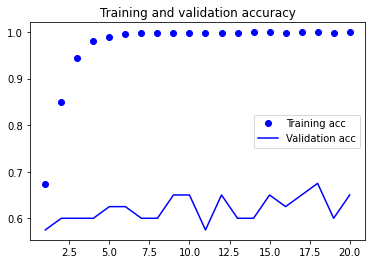

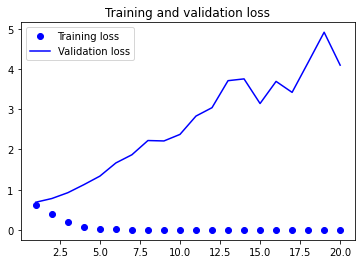

In [11]:
plot_accuracy_and_loss(history)

**Grafiklerde Overfitting görülmektedir. Bu, resim sayısının az olmasından kaynaklıdır. Resim işleme sürelerinin çok uzun sürmesinden dolayı eğitimi daha az veri ile yapmak durumundayız.**

In [12]:
testHedef = r"/content/gdrive/My Drive/Colab Notebooks/kaynak_train_test_vali/test"
test_generator = test_datagen.flow_from_directory(
    testHedef,
    target_size=(50, 50),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc ', test_acc)

Found 40 images belonging to 2 classes.
test acc: 0.75


**2.ADIM: Data augmentation yöntemi**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

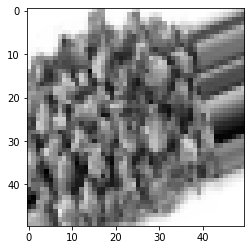

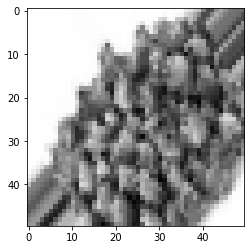

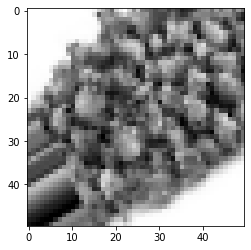

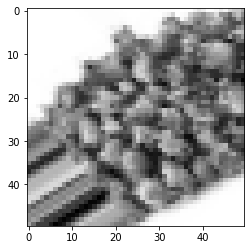

In [14]:
egitim=r"/content/gdrive/My Drive/Colab Notebooks/kaynak_train_test_vali/train/gul"
from keras.preprocessing import image

dosyaAdi = [os.path.join(egitim, dosyaAdi) for dosyaAdi in os.listdir(egitim)]

img_path = dosyaAdi[15] 

img = image.load_img(img_path, target_size=(50, 50))
#resim yukleniyor ve 50x50 olarak  boyutlaniyor.
x = image.img_to_array(img) 

x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [16]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    trainHedef,
    target_size=(50, 50),
    batch_size=50,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validationHedef,
    target_size=(50, 50),
    batch_size=50,
    class_mode='binary')

Found 320 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [17]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=960, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=90) 

Epoch 1/20
960/960 [==============================] - 193s 201ms/step - loss: 0.6390 - acc: 0.6376 - val_loss: 0.6284 - val_acc: 0.6250
Epoch 2/20
960/960 [==============================] - 194s 202ms/step - loss: 0.5719 - acc: 0.6995 - val_loss: 0.6387 - val_acc: 0.6500
Epoch 3/20
960/960 [==============================] - 195s 203ms/step - loss: 0.5115 - acc: 0.7446 - val_loss: 0.5652 - val_acc: 0.7250
Epoch 4/20
960/960 [==============================] - 192s 200ms/step - loss: 0.4544 - acc: 0.7841 - val_loss: 0.9186 - val_acc: 0.6000
Epoch 5/20
960/960 [==============================] - 193s 201ms/step - loss: 0.4004 - acc: 0.8176 - val_loss: 0.6073 - val_acc: 0.8000
Epoch 6/20
960/960 [==============================] - 193s 201ms/step - loss: 0.3490 - acc: 0.8457 - val_loss: 0.5688 - val_acc: 0.7750
Epoch 7/20
960/960 [==============================] - 195s 203ms/step - loss: 0.2995 - acc: 0.8699 - val_loss: 1.5604 - val_acc: 0.5750
Epoch 8/20
960/960 [============================

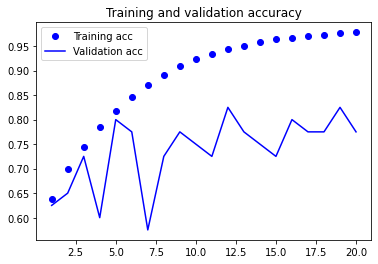

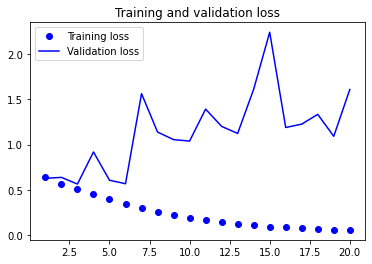

In [18]:
plot_accuracy_and_loss(history)


**Şekildeki grafiklerde aldığımız sonuç yine bir önceki grafik sonuçlarına benzemektedir. Data Augmentation problemimizi çözmekte bir başarı gösteremedi.** 


In [19]:

testHedef = r"/content/gdrive/My Drive/Colab Notebooks/kaynak_train_test_vali/test"
test_generator = test_datagen.flow_from_directory(
    testHedef,
    target_size=(50, 50),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc:', test_acc)

Found 40 images belonging to 2 classes.
test acc: 0.675000011920929


**3.ADIM Drop-out ile deney tekrarı**

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Dropout has been added.
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [21]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    trainHedef,
    target_size=(50, 50),
    batch_size=50,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validationHedef,
    target_size=(50, 50),
    batch_size=50,
    class_mode='binary')

Found 320 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [22]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=960, 
    epochs=20,
    validation_data=validation_generator,
    validation_steps=90) 

Epoch 1/20
960/960 [==============================] - 197s 206ms/step - loss: 0.6551 - acc: 0.6160 - val_loss: 0.6439 - val_acc: 0.6250
Epoch 2/20
960/960 [==============================] - 192s 200ms/step - loss: 0.6039 - acc: 0.6751 - val_loss: 0.6494 - val_acc: 0.6250
Epoch 3/20
960/960 [==============================] - 193s 202ms/step - loss: 0.5507 - acc: 0.7193 - val_loss: 0.7251 - val_acc: 0.6500
Epoch 4/20
960/960 [==============================] - 195s 203ms/step - loss: 0.4974 - acc: 0.7581 - val_loss: 0.6982 - val_acc: 0.7250
Epoch 5/20
960/960 [==============================] - 193s 201ms/step - loss: 0.4441 - acc: 0.7902 - val_loss: 0.8689 - val_acc: 0.6750
Epoch 6/20
960/960 [==============================] - 192s 200ms/step - loss: 0.3921 - acc: 0.8220 - val_loss: 0.6636 - val_acc: 0.7750
Epoch 7/20
960/960 [==============================] - 194s 202ms/step - loss: 0.3521 - acc: 0.8439 - val_loss: 0.7385 - val_acc: 0.7750
Epoch 8/20
960/960 [============================

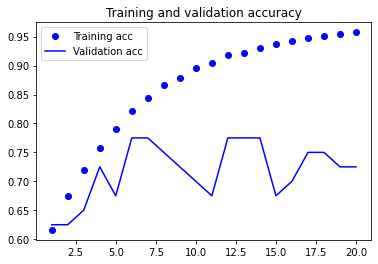

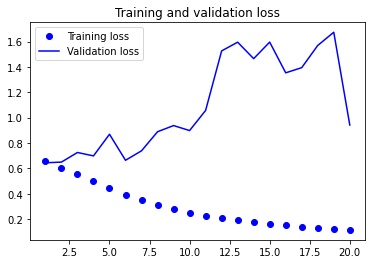

In [23]:
plot_accuracy_and_loss(history)

**Eğitime drop-out eklenerek deney tekrarı yapıldı.(augmentation+drop-out) Drop-out değeri 0.5 olarak girildi fakat bu deney tekrarından sonra Underfitting gerçekleşti. Fakat bu düşüş kabul edilebilir değerlere uzak değerler değil, 10 fotoğraftan 6 fotoğrafı hala tanımaya devam ediyor.**  


In [24]:
test_generator = test_datagen.flow_from_directory(
    testHedef,
    target_size=(50, 50),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc ', test_acc)

Found 40 images belonging to 2 classes.
test acc  0.6499999761581421


**4.ADIM Erken Epoch Kesme Deneyi**

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 3)))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPool2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # Dropout has been added.
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory(
    trainHedef,
    target_size=(50, 50),
    batch_size=50,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validationHedef,
    target_size=(50, 50),
    batch_size=50,
    class_mode='binary')

Found 320 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [34]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=960, 
    epochs=3,
    validation_data=validation_generator,
    validation_steps=90) 

Epoch 1/3
960/960 [==============================] - 207s 216ms/step - loss: 0.3407 - acc: 0.8506 - val_loss: 0.5911 - val_acc: 0.7500
Epoch 2/3
960/960 [==============================] - 205s 214ms/step - loss: 0.3010 - acc: 0.8699 - val_loss: 1.2103 - val_acc: 0.6750
Epoch 3/3
960/960 [==============================] - 206s 214ms/step - loss: 0.2606 - acc: 0.8872 - val_loss: 0.6772 - val_acc: 0.8500


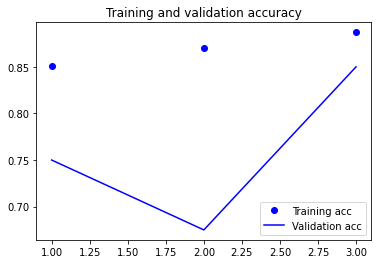

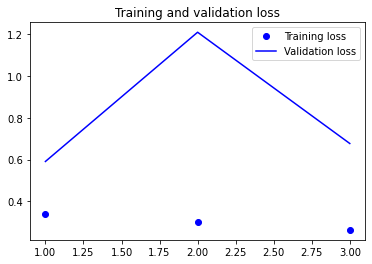

In [35]:
plot_accuracy_and_loss(history)


In [36]:
test_generator = test_datagen.flow_from_directory(
    testHedef,
    target_size=(50, 50),
    batch_size=50,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=90)
print('test acc ', test_acc)

Found 40 images belonging to 2 classes.
test acc  0.699999988079071


**Son işlemimizde 3 epoch'ta kesilerek yeni grafikleri ürettik. Çünkü ilk grafiklerde train acc eğrileri 3. Epoch'tan sonra bozulma göstermektedir. Bu sefer grafik sonuçlarımızda test acc değerimizde bir artış gözlemledik ve grafikte de bir değişiklik söz konusu. Değerlerin beklenenden biraz daha düşük çıkması yetersiz veri, küçük boyutluluk ve yetersiz epoch ile akalalı. Fakat hala kötü sayılabilecek bir sonuç yok 7/10 fotoğraf tanınabiliyor.**

**Sonuç**

Eğittiğimiz verilere göre açıklama yapmak gerekirse, kullandığımız dataset'ler yetersiz sayıda olduğu için, gerçeğe uzak veriler elde ettik. Bu eğitimler, çok daha fazla veri ile gerçekleştirilseydi, çok daha iyi sonuçlar alınabilirdi. Derin öğrenme algoritmalarında çok fazla GPU (Graphics Processing Unit) yani Grafik İşlemci Birimi kullanıldığı için eğitimler çok uzun sürebiliyor. Bu işlemlerin daha kısa sürmesi ve daha iyi sonuçlar alınabilmesi için güçlü grafik işlemciler kullanılması gerekmektedir. Sonuçlar çok yeterli olmasa da aldığımız son acc değeri 0.699 değerini verdi ve bu da ortalama 7/10 resmin tanındığını göstermektedir. 